<a href="https://colab.research.google.com/github/rahulrajpr/TensorFlowDeveloperCertifcateTraining/blob/NeuralNetworkRegression/PracticeRegressionOnDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [64]:
path = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
insurance = pd.read_csv(path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [66]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [67]:
insurance.select_dtypes(include = 'object').nunique()

sex       2
smoker    2
region    4
dtype: int64

In [68]:
from IPython.core.display import clear_output
!pip install feature_engine
clear_output()

### Lets do the one hot encoding

In [69]:
from feature_engine.encoding import OneHotEncoder

In [70]:
onehot = OneHotEncoder(drop_last = True)

In [71]:
onehot.fit(insurance)

OneHotEncoder(drop_last=True)

In [72]:
insurance = onehot.transform(insurance)

In [73]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   int64  
 5   smoker_yes        1338 non-null   int64  
 6   region_southwest  1338 non-null   int64  
 7   region_southeast  1338 non-null   int64  
 8   region_northwest  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


### Create X and y

In [74]:
X = insurance.drop('charges', axis =1)
y = insurance['charges']

**Explore the target variables**

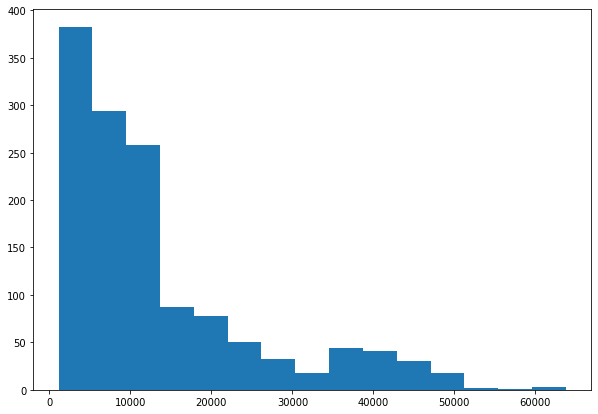

In [75]:
plt.figure(figsize = [10,7])
plt.hist(y, bins = 15)
plt.show()

In [76]:
y.median(), y.mean()

(9382.033, 13270.422265141257)

### Lets do the train-test split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.8, random_state = 100)

In [79]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 8), (1070,), (268, 8), (268,))

### Scaling of the features

Neural Networks prefere Normalisation

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [82]:
X_train[:] = scaler.transform(X_train)
X_test[:] = scaler.transform(X_test)

### Lest try out the base model

In [83]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential(
    [tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)],
     name = 'base_model'
)

In [84]:
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

In [85]:
insurance_model.fit(X_train,y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13063.8467 - mae: 13063.8467
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13061.4326 - mae: 13061.4326
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13056.2412 - mae: 13056.2412
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13043.7324 - mae: 13043.7324
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13012.5605 - mae: 13012.5605
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 12933.9072 - mae: 12933.9072
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12734.9658 - mae: 12734.9658
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12229.1455 - mae: 12229.1455
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 11043.1201 - mae: 11043.1201
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 9367.970

In [86]:
def metrics(y_test, y_pred):
 mae = tf.metrics.mean_absolute_error(y_test,y_pred.squeeze()).numpy()
 mse = tf.metrics.mean_squared_error(y_test,y_pred.squeeze()).numpy()
 print('mae : ',mae)
 print('mse : ',mse)
 return mae, mse

In [87]:
mae, mse = metrics(y_test, insurance_model.predict(X_test))

9/9 [==============================] - 0s 3ms/step
mae :  3279.2256
mse :  38034460.0


### Model1

In [88]:
tf.random.set_seed(42)
insurance_model1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1, name = 'output')],
        name = 'model1'
)

In [89]:
insurance_model1.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ['mae'])

In [90]:
insurance_model1.fit(X_train,y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13062.7656 - mae: 13062.7656
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13056.5713 - mae: 13056.5713
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13041.8672 - mae: 13041.8672
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13011.4482 - mae: 13011.4482
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 12957.3789 - mae: 12957.3789
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12872.3105 - mae: 12872.3105
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12748.7012 - mae: 12748.7012
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12579.1992 - mae: 12579.1992
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12358.2002 - mae: 12358.2002
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12077.15

In [91]:
y_pred1 = insurance_model1.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [92]:
mae1,mse1 = metrics(y_test, y_pred1)

mae :  3828.4248
mse :  56316348.0


### Model 2

In [93]:
tf.random.set_seed(42)
insurance_model2 = tf.keras.Sequential(
    [tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)],
     name = 'model2'
)

In [94]:
insurance_model2.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ['mae'])

In [95]:
history = insurance_model2.fit(X_train,y_train, epochs = 200, verbose = 0)

In [96]:
insurance_model2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3497.0229 - mae: 3497.0229


[3497.02294921875, 3497.02294921875]

<Figure size 720x504 with 0 Axes>

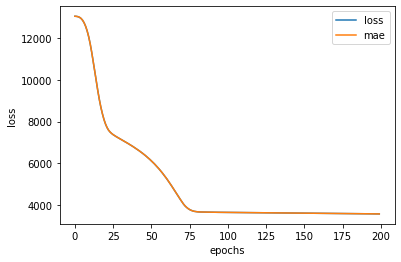

In [97]:
plt.figure(figsize=[10,7])
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend();